## Imports

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# TODO get interactive plotting working in jupyterlab
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy

from interval import interval, inf, imath

from safe_train import *

Instructions for updating:
non-resource variables are not supported in the long term


/Users/stevenschaefer/safe-training/marabou/maraboupy/Marabou.py:31: UserWarning: ONNX parser is unavailable because onnx or onnxruntime packages are not installed
  warnings.warn("ONNX parser is unavailable because onnx or onnxruntime packages are not installed")


# Using Marabou

********************

Start of epoch 0
interval([2.0, 3.0])
[interval([1.7884757928550243, 2.681675475090742])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([1.7884757928550243, 2.681675475090742])
output interval interval([1.7884757928550243, 2.681675475090742])
********************

Start of epoch 1
interval([2.0, 3.0])
[interval([1.901494786143303, 2.8883815854787827])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([1.901494786143303, 2.8883815854787827])
output interval interval([1.901494786143303, 2.8883815854787827])
********************

Start of epoch 2
interval([2.0, 3.0])
[interval([2.1155025511980057, 3.178291991353035])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([2.1155025511980057, 3.178291991353035])
output interval interval([2.1155025511980057, 3.178291991353035])
********************

Start of epoch 3
interval([2.0, 3.0])
[interval([2.2637827806174755, 3.3714681081473827])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([2.2637827806174755, 3.3714681081473827])
output interval interval([2.2637827806174755, 3.3714681081473827])
********************

Start of epoch 4
interval([2.0, 3.0])
[interval([2.299588978290558, 3.419666349887848])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([2.299588978290558, 3.419666349887848])
output interval interval([2.299588978290558, 3.419666349887848])
********************

Start of epoch 5
interval([2.0, 3.0])
[interval([2.2542942985892296, 3.362463854253292])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([2.2542942985892296, 3.362463854253292])
output interval interval([2.2542942985892296, 3.362463854253292])
********************

Start of epoch 6
interval([2.0, 3.0])
[interval([2.1646222844719887, 3.245338059961796])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([2.1646222844719887, 3.245338059961796])
output interval interval([2.1646222844719887, 3.245338059961796])
********************

Start of epoch 7
interval([2.0, 3.0])
[interval([2.0606942512094975, 3.1054674722254276])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([2.0606942512094975, 3.1054674722254276])
output interval interval([2.0606942512094975, 3.1054674722254276])
********************

Start of epoch 8
interval([2.0, 3.0])
[interval([1.9685395397245884, 2.974927607923746])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([1.9685395397245884, 2.974927607923746])
output interval interval([1.9685395397245884, 2.974927607923746])
********************

Start of epoch 9
interval([2.0, 3.0])
[interval([1.9025701619684696, 2.8737469650804996])]
With Marabou:

INFO:tensorflow:Assets written to: tmp/assets


INFO:tensorflow:Assets written to: tmp/assets


adding constraints
0 > 2.0
0 < 3.0
1 > 1.0
1 < 4.0
ERROR
vals are {}


Without:

safe region test passed, interval was interval([1.9025701619684696, 2.8737469650804996])
output interval interval([1.9025701619684696, 2.8737469650804996])
4/4 [==============================] - 0s 460us/step
output_interval: [interval([1.9025701619684696, 2.8737469650804996])]


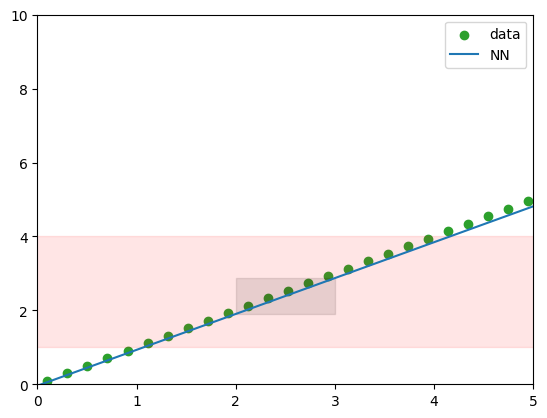

In [17]:
x = np.linspace(-10, 10, 100)
y = x
# plt.scatter(x, y)
# plt.show()

input_interval = interval[2, 3]
desired_interval = interval[1, 4]

model = safe_training_loop(input_interval, desired_interval, x, y, verbose=True)

# history = regression_model.fit(
#     x,
#     y,
#     epochs=100,
#     # Suppress logging.
#     verbose=0,
#     # Calculate validation results on 10% of the training data.
#     validation_split=0.1,
# )

y_predict = model.predict(x)

output_interval, _ = propagate_interval(input_interval, model)
print(f"output_interval: {output_interval}")
plot_intervals(input_interval, output_interval, x, y, y_predict, 
               xlim=[0, 5], ylim=[0, 10], desired_interval=desired_interval)


In [15]:
net = Marabou.read_tf("tmp", modelType="savedModel_v2")

In [7]:
regression_model.predict([2.0])

NameError: name 'regression_model' is not defined